# IMPORT DATA IN NOTEBOOK

---



Import all required libraries and ready them for use.

In [44]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns


Load dataset into a variable and remove unwanted columns/features from the dataframe.

In [45]:
data = pd.read_csv("Customer_Churn_Data.csv")
data.drop(['RowNumber'], axis='columns', inplace=True)
data['HasCrCard'] = data['HasCrCard'].map({1:True, 0:False})
data['IsActiveMember'] = data['IsActiveMember'].map({1:True, 0:False})
data['Exited'] = data['Exited'].map({1:True, 0:False})
data['Complain'] = data['Complain'].map({1:True, 0:False})
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,True,True,101348.88,True,True,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False,True,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,True,False,113931.57,True,True,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,False,False,93826.63,False,False,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False,False,5,GOLD,425


# DATA EXPLORATION

---



Overall shape of our dataframe (rows x columns)

In [46]:
print("Overall shape of the dataframe: ", data.shape,"\n")

Overall shape of the dataframe:  (10000, 17) 



Number of rows in our dataframe

In [47]:
print("Number of rows: ", data.shape[0],"\n")

Number of rows:  10000 



Number of columns/features in our dataframe

In [48]:
print("Number of columns/features: ", data.shape[1],"\n")

Number of columns/features:  17 



Features in our Dataframe

In [49]:
print("Data Features: ", data.columns.tolist(),"\n")

Data Features:  ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'] 



Checking if there are any missing values in our dataframe.

In [50]:
print("Missing values: ", data.isnull().sum().values.sum(),"\n")

Missing values:  0 



Count the number of unique values in each feature of our dataframe.

In [51]:
print("Count of unique values for each feature in the dataframe:\n\n", data.nunique())

Count of unique values for each feature in the dataframe:

 CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64


Summary statistics

In [52]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


Distribution in Categorical features using countplots.

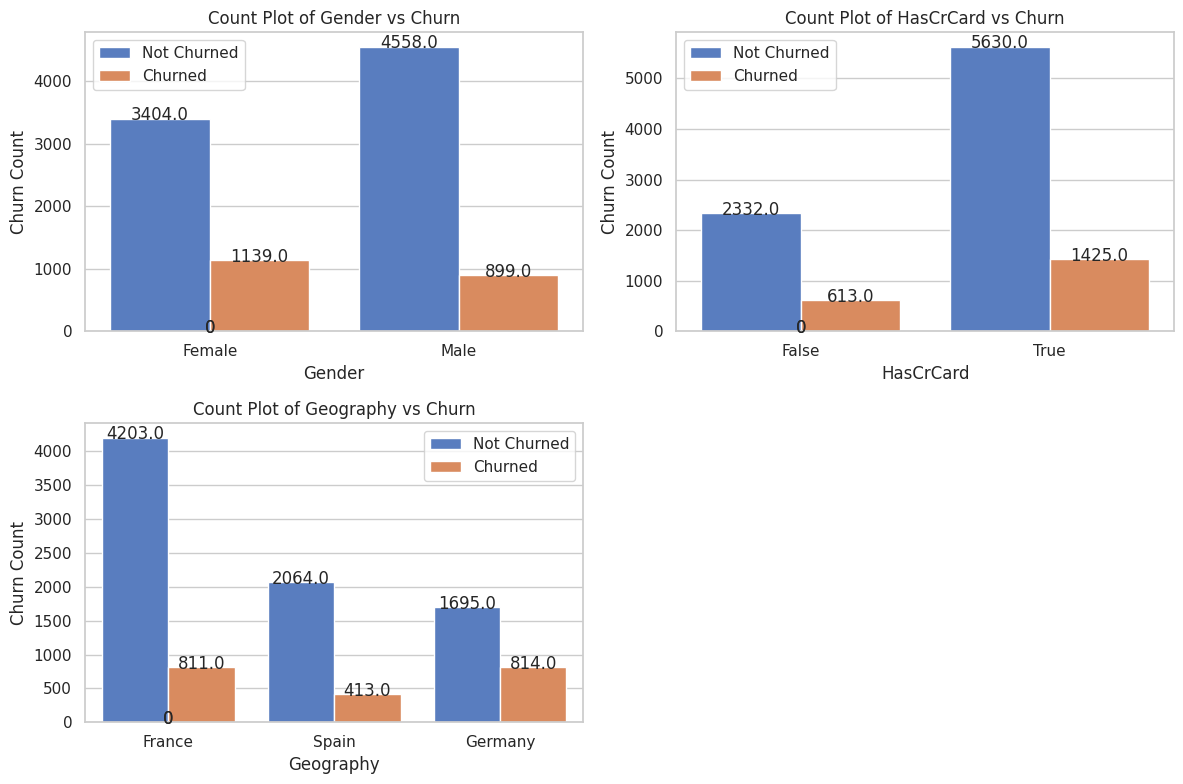

In [53]:
features = ['Gender', 'HasCrCard', 'Geography']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=data, x=feature, hue='Exited', palette='muted')
    plt.title(f'Count Plot of {feature} vs Churn')
    plt.legend(['Not Churned', 'Churned'])
    plt.xlabel(feature)
    plt.ylabel('Churn Count')

    for p in plt.gca().patches:
      plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.tight_layout()
plt.show()

KDE distplots to derive estimate of the probability density at different points along the range of data.

<Figure size 400x400 with 0 Axes>

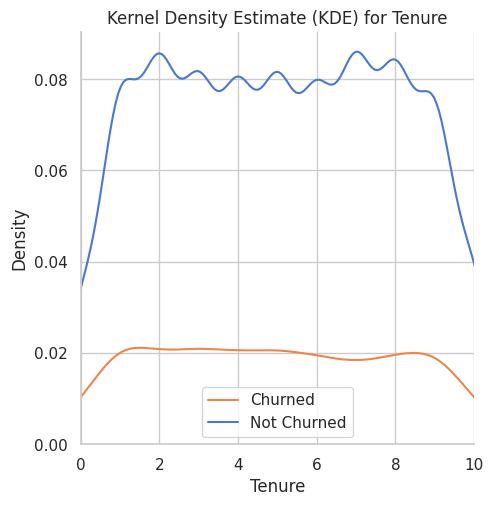

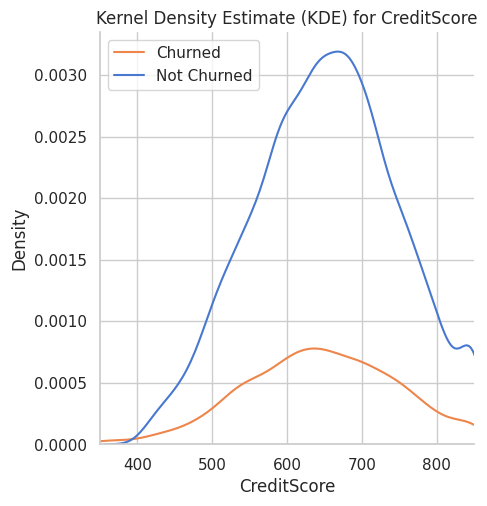

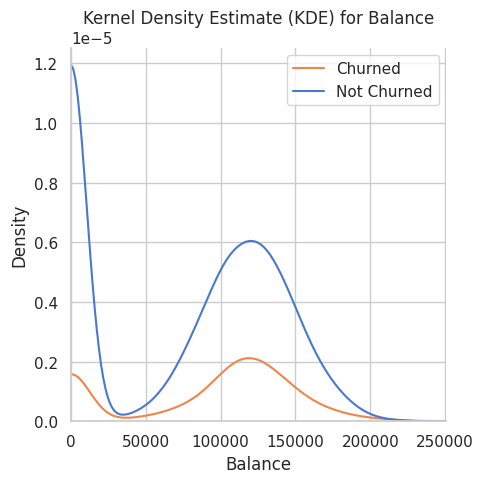

In [54]:
features = ['Tenure', 'CreditScore', 'Balance']
plt.figure(figsize=(4, 4))
for i, feature in enumerate(features):
    sns.displot(data, x=feature, hue="Exited", kind="kde",legend=False, palette='muted')
    plt.title(f'Kernel Density Estimate (KDE) for {feature}')
    plt.legend(['Churned', 'Not Churned'])
    plt.xlabel(feature)
    plt.ylabel('Density')

    # Set x-axis limits to match the Tenure data range
    plt.xlim(data[feature].min(), data[feature].max())


plt.tight_layout()
plt.show()

Histograms to observe the skewness (asymmetry) and kurtosis (peakedness) of the data distribution

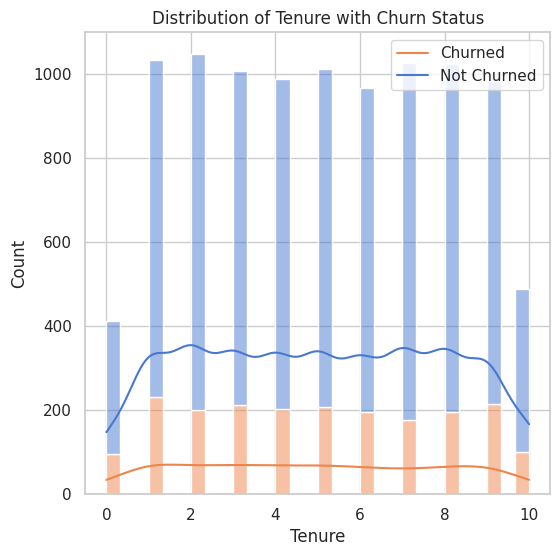

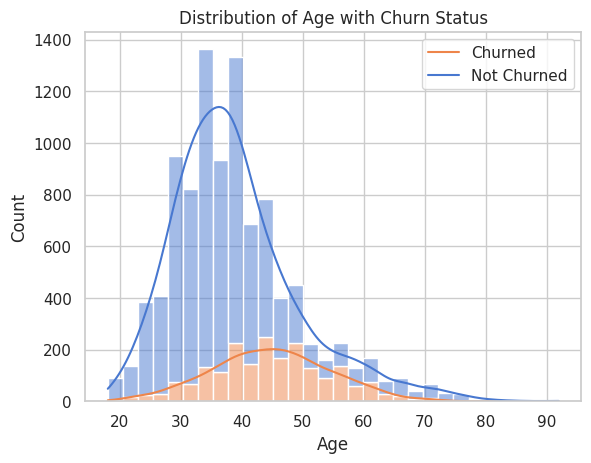

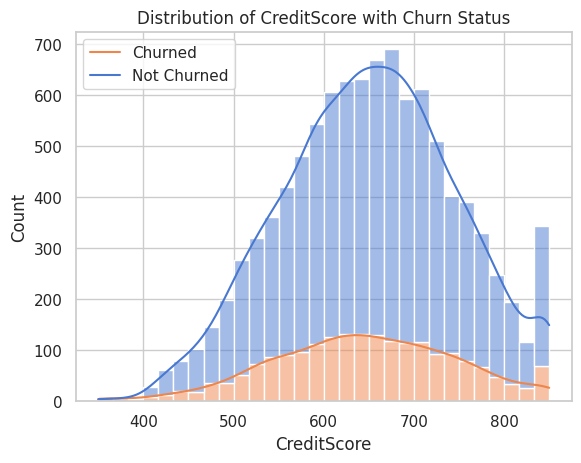

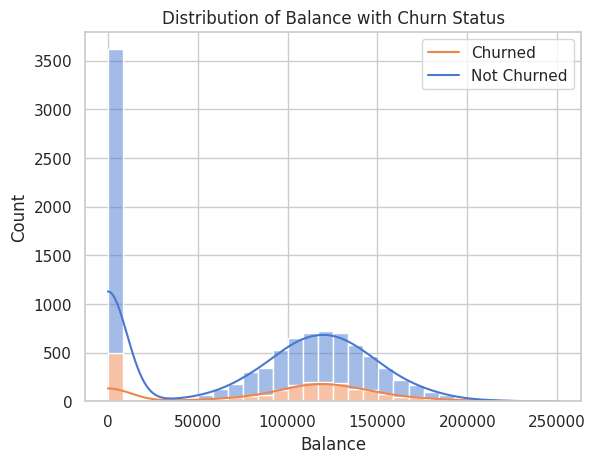

<Figure size 640x480 with 0 Axes>

In [55]:
# Set the style of seaborn
sns.set(style="whitegrid")

# make list of required features
features = ['Tenure','Age','CreditScore','Balance']

plt.figure(figsize=(6, 6))
for i, feature in enumerate(features):
  sns.histplot(data=data, x=feature, hue="Exited", kde=True, bins=30, palette='muted', multiple="stack")
  plt.title(f'Distribution of {feature} with Churn Status')
  plt.legend(['Churned', 'Not Churned'])
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()
  print('\n\n')

plt.tight_layout()

# DATA PREPROCESSING

Detect missing values using heatmaps

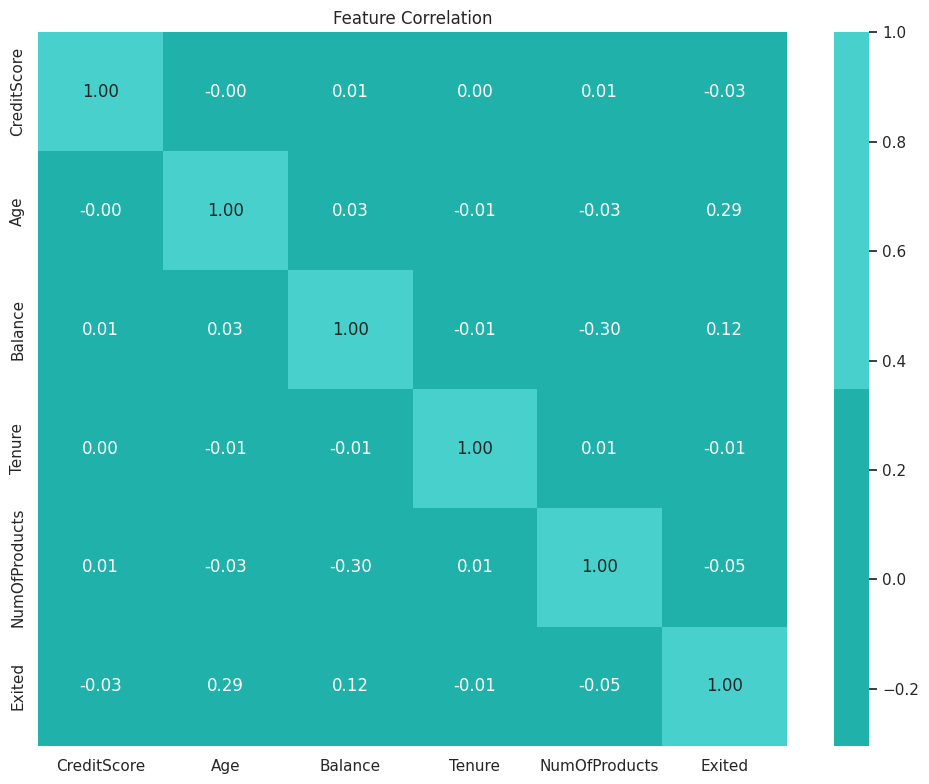

In [56]:
corr_matrix = data[['CreditScore', 'Age', 'Balance','Gender','Card Type', 'Tenure', 'NumOfProducts', 'Exited']].corr(numeric_only=True)

# Set up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap = ['#20B2AA','#48D1CC'], fmt=".2f")

# Add title and adjust layout
plt.title('Feature Correlation')
plt.tight_layout()

# Display the plot
plt.show()

Scatter plots to detect the outliers in our data

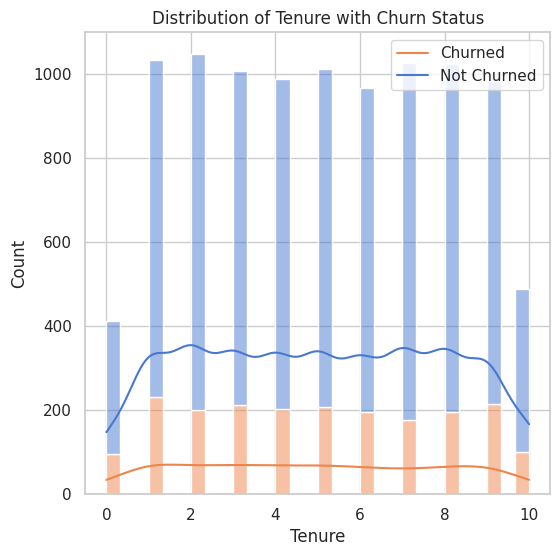

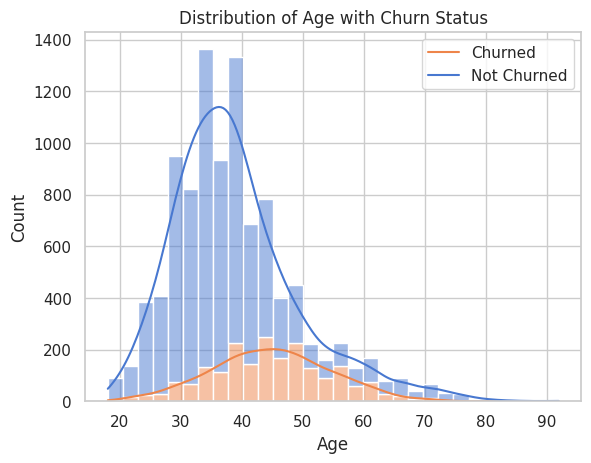

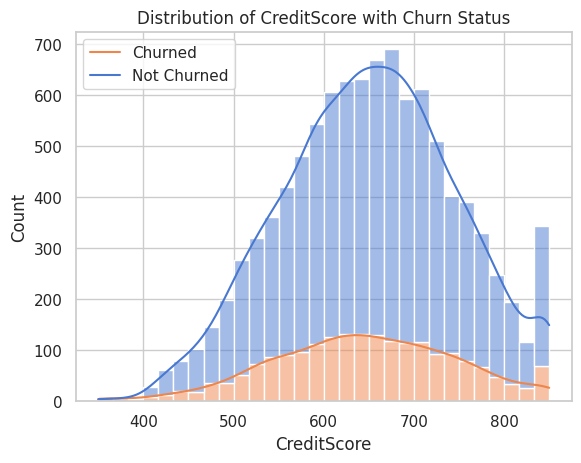

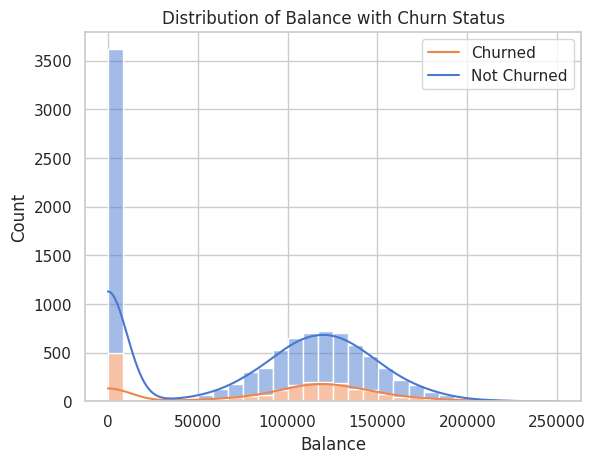

<Figure size 640x480 with 0 Axes>

In [57]:
# make list of required features
features = ['Tenure','Age','CreditScore','Balance']

plt.figure(figsize=(6, 6))
for i, feature in enumerate(features):
  sns.histplot(data=data, x=feature, hue="Exited", kde=True, bins=30, palette='muted', multiple="stack")
  plt.title(f'Distribution of {feature} with Churn Status')
  plt.legend(['Churned', 'Not Churned'])
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()
  print('\n\n')

plt.tight_layout()

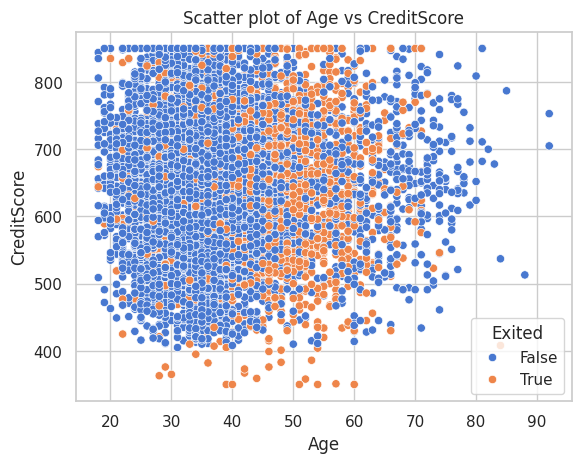

In [58]:
# Scatter plot between 'Age' and 'CreditScore'
sns.scatterplot(data=data, x='Age', y='CreditScore', hue='Exited', palette='muted')
plt.title('Scatter plot of Age vs CreditScore')
plt.show()

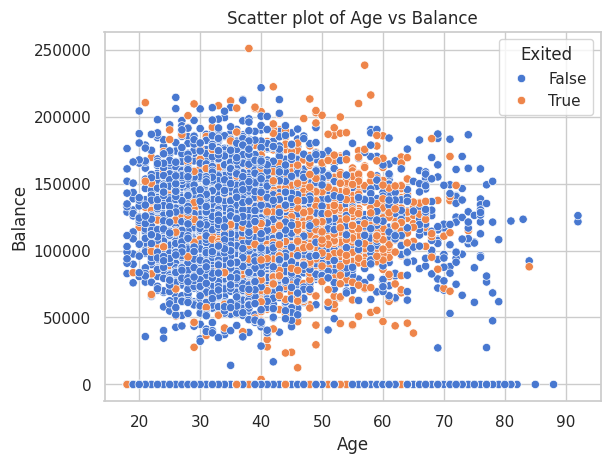

In [59]:
# Scatter plot between 'Age' and 'Balance'
sns.scatterplot(data=data, x='Age', y='Balance', hue='Exited', palette='muted')
plt.title('Scatter plot of Age vs Balance')
plt.show()

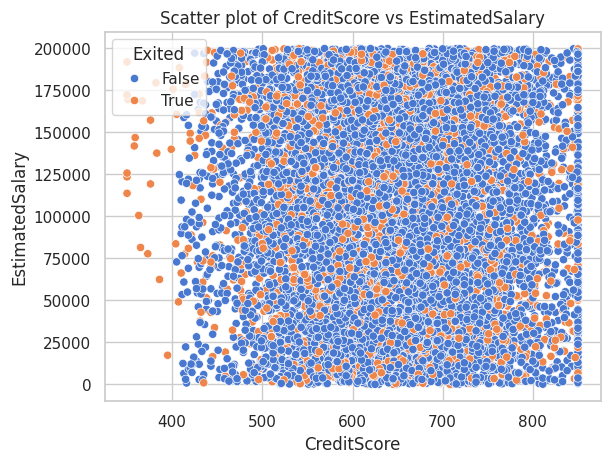

In [60]:
# Scatter plot between 'CreditScore' and 'EstimatedSalary'
sns.scatterplot(data=data, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='muted')
plt.title('Scatter plot of CreditScore vs EstimatedSalary')
plt.show()

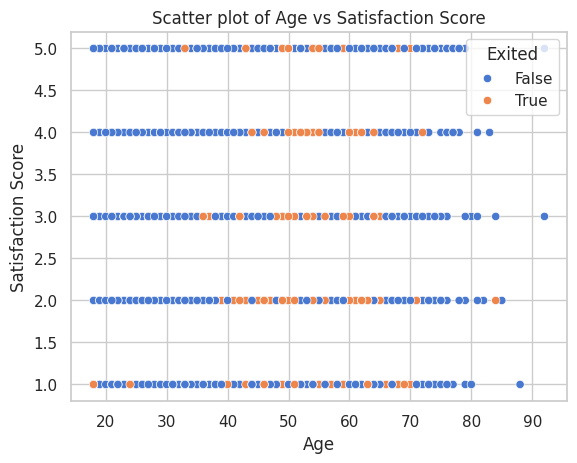

In [61]:
# Scatter plot between 'Age' and 'Satisfaction Score'
sns.scatterplot(data=data, x='Age', y='Satisfaction Score', hue='Exited', palette='muted')
plt.title('Scatter plot of Age vs Satisfaction Score')
plt.show()

Pair plots to understand relationship between features.

In [62]:
sns.pairplot(data, hue='Exited', markers=['o', 's'])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# DATA VISUALIZATION

Distribution of customers using Pie chart

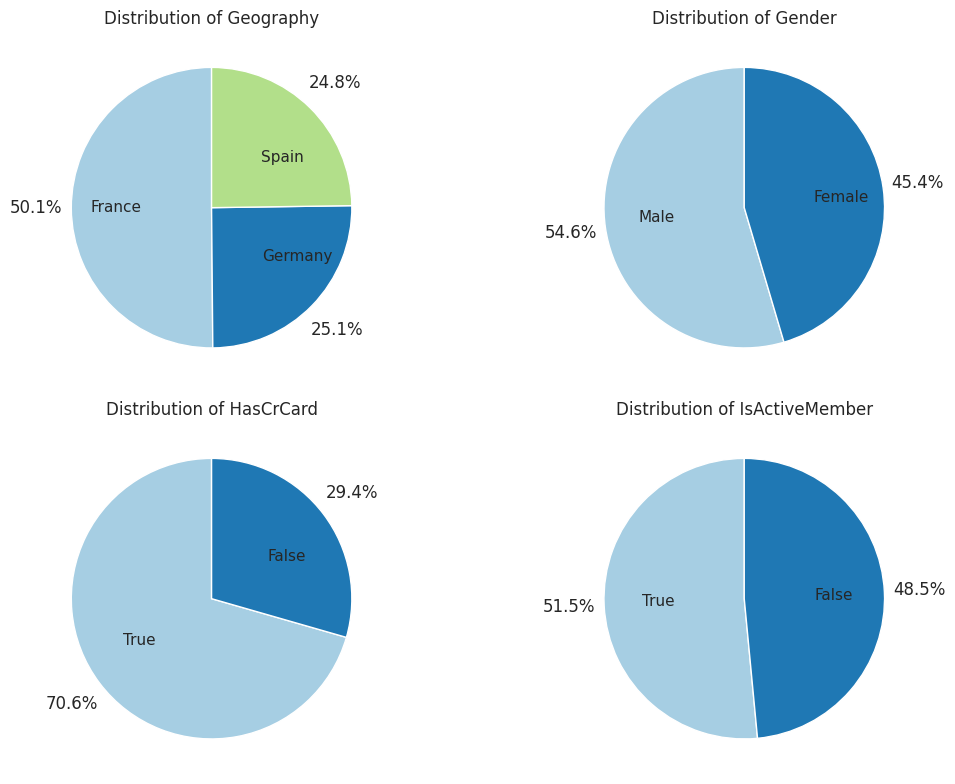

In [63]:
features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(12, 8))
num_features = len(features)
rows = num_features // 2
cols = 2 if num_features % 2 == 0 else num_features // 2 + 1

colors = plt.cm.Paired.colors  # Choosing the Paired color palette

for i, feature in enumerate(features, start=1):
    distribution_churn_rate = data[feature].value_counts().to_frame().reset_index()

    # Use the existing figure and axis for each iteration
    plt.subplot(rows, cols, i)
    plt.pie(distribution_churn_rate[feature], labels=distribution_churn_rate['index'], autopct='%1.1f%%', startangle=90, pctdistance=1.25, labeldistance=0.5, colors=colors)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

Box plots to compare distributions of numerical features between churned and non-churned customers.

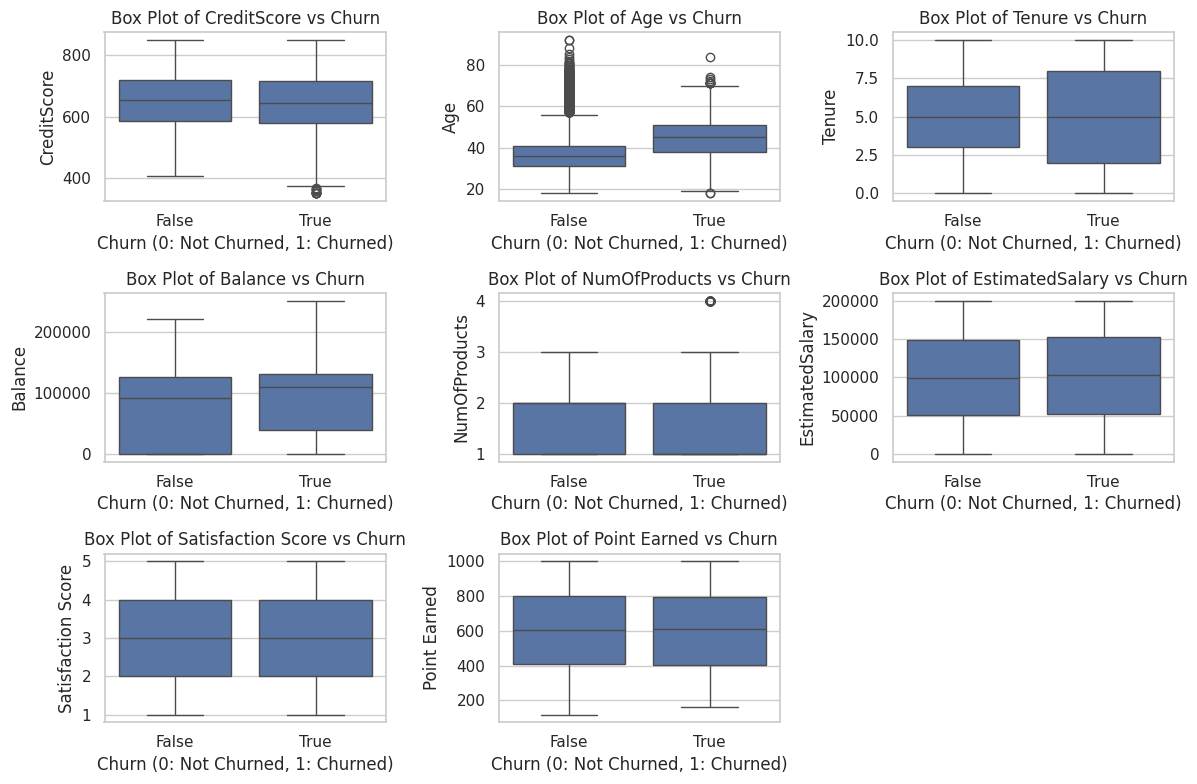

In [64]:
# Define numerical features to compare
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# Plotting using seaborn
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Exited', y=feature, data=data)
    plt.title(f'Box Plot of {feature} vs Churn')
    plt.xlabel('Churn (0: Not Churned, 1: Churned)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

Violin plots to compare distributions of numerical features between churned and non-churned customers.

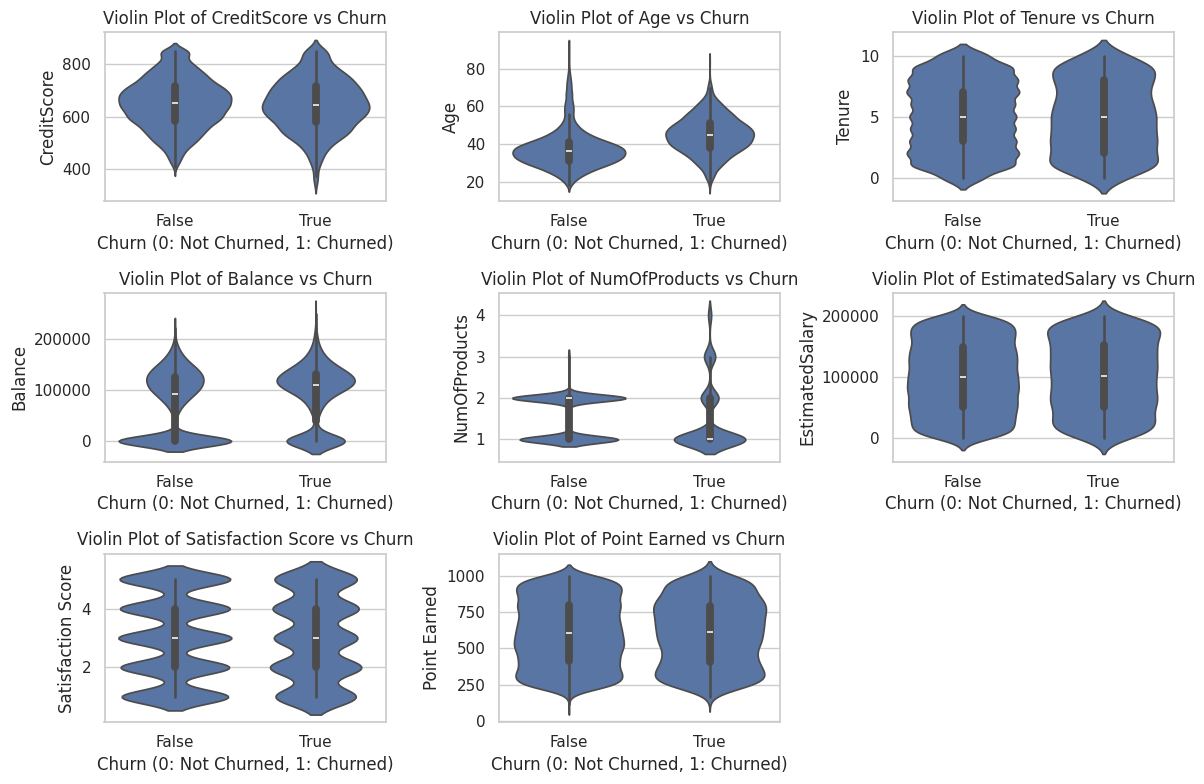

In [65]:
# Plotting using violin plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='Exited', y=feature, data=data)
    plt.title(f'Violin Plot of {feature} vs Churn')
    plt.xlabel('Churn (0: Not Churned, 1: Churned)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# MODELLING AND ANALYSIS

---



Import all packages required for creating and executing ML models

In [66]:
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter


import warnings
warnings.filterwarnings("ignore")

Define functions to run and evaluate the model.

In [67]:
def RunModel(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cr_v_sc = cross_val_score(model, x_train, y_train, cv=cv, scoring='roc_auc')
    r_a_s = roc_auc_score(y_test, pred)
    return accuracy_score(y_test, pred), r_a_s, np.mean(cr_v_sc), f1_score(y_test, pred)

def model_evaluation(model,x_test,y_test):

    cm = confusion_matrix(y_test,model.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.3%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = ['#20B2AA','#48D1CC'],fmt ='')

    print(classification_report(y_test,model.predict(x_test)))

# LOGISTIC REGRESSION

Generate synthetic samples for the minority class (Churned) using SMOTE - Synthetic Minority Over-sampling Technique

In [68]:
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

over = SMOTE(sampling_strategy=1)
X = data.drop(columns=['Exited']).values
Y = data['Exited'].values

X, Y = over.fit_resample(X, Y)
Counter(Y)



Counter({True: 7962, False: 7962})

Split the dataframe into train and test data for Logistic regression ML Algorithm

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 15)

Initialize Machine Learning model - Logistic Regression

In [70]:
# Initializing  and training model using function

LogisticRegressionModel = LogisticRegression()

RunModel(LogisticRegressionModel,x_train,y_train,x_test,y_test)

(0.5814148179154458, 0.5814587231835608, 0.5762960229197026, 0.621068586585828)

              precision    recall  f1-score   support

       False       0.60      0.48      0.53      2390
        True       0.57      0.69      0.62      2388

    accuracy                           0.58      4778
   macro avg       0.59      0.58      0.58      4778
weighted avg       0.59      0.58      0.58      4778



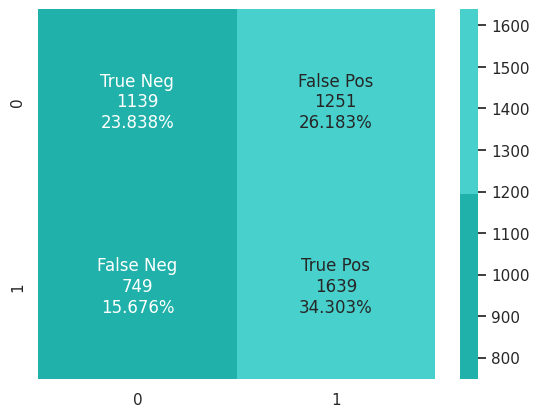

In [71]:
# Model evaluation using function
model_evaluation(LogisticRegressionModel,x_test,y_test)

# RANDOM FOREST CLASSIFIER ALGORITHM

Split the dataframe into train and test data for Random Forest Classifier ML Algorithm

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 15)

Initialize the Random Forest Classifier model

In [73]:
RandomForestClassifierModel = RandomForestClassifier()

RunModel(RandomForestClassifierModel,x_train,y_train,x_test,y_test)

(0.9995814148179154,
 0.9995814147445737,
 0.9997360056840766,
 0.9995812395309883)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2390
        True       1.00      1.00      1.00      2388

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778



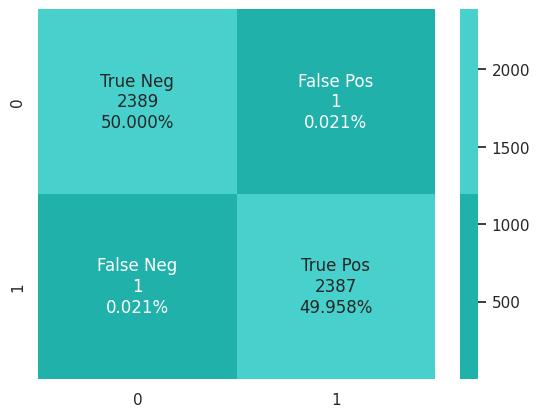

In [74]:
model_evaluation(RandomForestClassifierModel,x_test,y_test)


A cross-validation score of 99.98% and an ROC AUC score of 99.91% seem extremely high and might warrant further investigation

# K-NEAREST NEIGHBORS ALGORITHM

Split the dataframe into train and test data for KNN ML Algorithm

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

In [76]:
k = 3 # Number of neighbors

KNearestNeighboursModel = KNeighborsClassifier(n_neighbors=k)

RunModel(KNearestNeighboursModel,X_train,y_train,X_test,y_test)


(0.7337519623233909,
 0.7350963252390582,
 0.7855443105121812,
 0.7627308337996643)

              precision    recall  f1-score   support

       False       0.82      0.61      0.70      1609
        True       0.68      0.86      0.76      1576

    accuracy                           0.73      3185
   macro avg       0.75      0.74      0.73      3185
weighted avg       0.75      0.73      0.73      3185



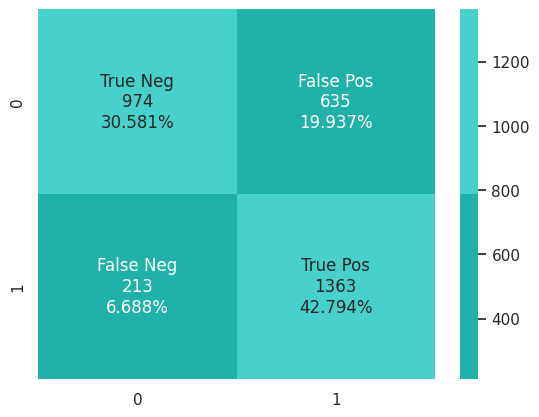

In [77]:
model_evaluation(KNearestNeighboursModel,X_test,y_test)

# **Comparison**

In [78]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNearestNeighboursModel': KNeighborsClassifier()
}

In [79]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, specificity, sensitivity, auc, f1])

# Create a DataFrame to display results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Specificity', 'Sensitivity', 'AUC', 'F1 Score'])
print(df_results)


                     Model  Accuracy  Specificity  Sensitivity       AUC  \
0      Logistic Regression  0.594349     0.470479     0.720812  0.602422   
1            Random Forest  0.999058     0.998135     1.000000  0.999760   
2  KNearestNeighboursModel  0.704553     0.584835     0.826777  0.780998   

   F1 Score  
0  0.637486  
1  0.999049  
2  0.734705  


# Conclusion

All the goals were achieved during the work: the data was studied, processed and used for training.

Random forest was much more effective than logistic regression, showing decent results with default hyperparameters.

Also of particular value are the patterns derived from exploratory analysis:

The chance of losing an active client is less than that of an inactive one
The lowest chance of churn is for customers with two bank products. With the increase in products, the outflow increases
As EsitmatedSalary grows, churn shows a slight linear increase
With a zero balance, the chance of outflow is lower than in other cases
With a high credit rating, customers are less likely to leave the bank
Balance varies slightly by gender
The average age of female clients is slightly higher than that of male clients
Men are 10% more active than women
The chance of losing an active client is less than that of an inactive one
Women are more likely to purchase the bank's third and fourth products
Germany has a year higher average age than other countries
Clients aged between 50 and 80 are the most active
With increasing age, balance tends to median values and the dispersion of the balance distribution increases
The linear dependence of the Age and EstimatedSalary features with the NumOfProducts feature is clearly expressed